# Python for Data Science

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AI-Core/Python-for-Data-Science/blob/main/Part%204%20-%20Model%20Training%20%26%20Evaluation%20TODO.ipynb)


In [84]:
import pandas as pd
df = pd.read_csv(
    "https://raw.githubusercontent.com/AI-Core/Python-for-Data-Science/main/part-3-output.csv")

# https://www.youtube.com/watch?v=VbpthuZlUlo

In [85]:
# dropping non significant columns from X and the target column
X = df #convention- X is the features of the data
y = df.pop('m13') #y is usually the target; y is labels

y

0         1
1         1
2         1
3         1
4         1
         ..
116053    0
116054    0
116055    0
116056    0
116057    0
Name: m13, Length: 116058, dtype: int64

In [86]:
X
y

# if X == df:
#   print("they are the same") #doesnt work see error

if X is df:
  print("they are the same")

df.head()

they are the same


,Unnamed: 0,Unnamed: 0.1,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,...,m5,m6,m7,m8,m9,m10,m11,m12,months_until_first_payment,has_insurance
0,0,0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,12,2012-03-01,2012-05-01,...,0,0,1,0,0,0,0,0,2,1
1,1,1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,12,2012-01-01,2012-03-01,...,0,0,0,0,0,0,1,0,2,0
2,2,2,742515242108,Z,Thornton-Davis,3.250,366000,6,2012-01-01,2012-03-01,...,0,0,0,0,0,0,0,0,2,0
3,3,3,601385667462,X,OTHER,4.750,135000,12,2012-02-01,2012-04-01,...,0,0,0,0,1,1,1,1,2,0
4,4,4,273870029961,X,OTHER,4.750,124000,12,2012-02-01,2012-04-01,...,4,5,6,7,8,9,10,11,2,0


In [87]:
#list(df.columns)
X = X.drop(labels=[
    "Unnamed: 0",
    "Unnamed: 0.1",
    "financial_institution",
    "origination_date",
    "first_payment_date",
    "loan_id" #remove cos it isn't a real number
    #leave source and loan_purpose can do one_hot encoding
],axis=1)

list(X.columns)

['source',
 'interest_rate',
 'unpaid_principal_bal',
 'loan_term',
 'loan_to_value',
 'number_of_borrowers',
 'debt_to_income_ratio',
 'borrower_credit_score',
 'loan_purpose',
 'insurance_percent',
 'm1',
 'm2',
 'm3',
 'm4',
 'm5',
 'm6',
 'm7',
 'm8',
 'm9',
 'm10',
 'm11',
 'm12',
 'months_until_first_payment',
 'has_insurance']

In [88]:
# apply one-hot encoding to nominal variables
X = pd.get_dummies(data=X, columns=['source', 'loan_purpose']) #vector full of zeroes except in category that it is which is 1
X

,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,m1,m2,...,m11,m12,months_until_first_payment,has_insurance,source_X,source_Y,source_Z,loan_purpose_A23,loan_purpose_B12,loan_purpose_C86
0,4.250,214000,12,95,1,22.0,694.0,30.0,0,0,...,0,0,2,1,0,0,1,0,0,1
1,4.875,144000,12,72,1,44.0,697.0,0.0,0,0,...,1,0,2,0,0,1,0,0,1,0
2,3.250,366000,6,49,1,33.0,780.0,0.0,0,0,...,0,0,2,0,0,0,1,0,1,0
3,4.750,135000,12,46,2,44.0,633.0,0.0,0,0,...,1,1,2,0,1,0,0,0,1,0
4,4.750,124000,12,80,1,43.0,681.0,0.0,0,1,...,10,11,2,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116053,4.125,153000,12,88,2,22.0,801.0,25.0,0,0,...,0,0,2,1,0,1,0,1,0,0
116054,3.000,150000,4,35,1,37.0,796.0,0.0,0,0,...,0,0,2,0,0,0,1,0,1,0
116055,3.875,166000,12,58,2,49.0,724.0,0.0,0,0,...,0,0,2,0,1,0,0,0,1,0
116056,4.250,169000,12,74,2,13.0,755.0,0.0,0,0,...,0,0,2,0,1,0,0,1,0,0


In [89]:
# apply normalisation using sklearn
from sklearn.preprocessing import MinMaxScaler
normalisation = MinMaxScaler()
X = normalisation.fit_transform(X)

## The Problem

__Loan default prediction__ is one of the most critical and crucial problems faced by financial institutions and organizations as it has a noteworthy effect on the profitability of these institutions. In recent years, there is a tremendous increase in the volume of _non–performing_ loans which results in a jeopardizing effect on the growth of these institutions. 

Therefore, to maintain a healthy portfolio, banks put stringent monitoring and evaluation measures in place to ensure the timely repayment of loans by borrowers. Despite these measures, a major proportion of loans become delinquent. _Delinquency_ occurs when a borrower misses a payment against his/her loan.

Given the information like mortgage details, borrowers-related details, and payment details, your objective is to build a system that can predict the defaulter status of loans for the next month given the defaulter status for the previous 12 months (in the number of months).



# Part 4 - Model Training and Evaluation

Now, it's time to do some machine learning.
You have your final training and testing data, and you're ready to start training different some machine learning models to model the relationships between the features and labels.

## Train Test Split

The final thing required before training a machine learning model on our data is to split the data into different sets.
training and testing for model training and evaluation. 

You can learn more about why we perform train and test splitting [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)


In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( #train data to fit algorithms ie what inputs and outputs should look like
                                                    #test data is completely unseen for final decision
    X,
    y,
    test_size=0.3, 
    stratify=y
) #stratify equal proportion of defaulters
# why split data?
# we need to test the model; this is how wel it does on totally unseen data; 
# cannot report performance of algorithm on same data it was trained to perform well on -- overfitting

X_val, X_test, y_val, y_test = train_test_split( #val data to choose between diff algorithms; still not sure what the point of this was- unused
    X_test,
    y_test,
    test_size=0.5, 
    #stratify=y_test
)
# stratify (to deal with target data imbalance); the proportion of examples in the test set with one label is the same proportion as are in the population
# validation data set- use val set (not data train), to compare between different models
# eg 1 ML algorithm, train on training data,  evaluate performance on val set
# evaluate performace of diff models on val set then choose best
# but if choosing model based on how well it does on val set, ie designed to do well on val set--
# that val set has been informing which model to use ie no longer unseen data--
# Thats why we have the test set seperate. totally unseen data

Alright, so we are getting closer to training our mdodel. This notebook was just focussed around preparing the data before we actually train the model. We did Feature Selection, Feature Encoding and then Feature Scaling. It is important to notice the flow of the preprocessing steps. It should most likely happen in this manner if not always.

### Model Training 

We will be training different models and see which works best. 
1. Logistic Regression : For this model, how to prepare the data w.r.t outliers, feature scaling and feature encoding ? 
2. Decision Tree : How to prepare the data for this model ? Is it robust to outliers ? 
3. Random Forest : [Read More Here](https://towardsdatascience.com/understanding-random-forest-58381e0602d2)
4. SVM : [Read More Here](https://towardsdatascience.com/https-medium-com-pupalerushikesh-svm-f4b42800e989#:~:text=SVM%20or%20Support%20Vector%20Machine,separates%20the%20data%20into%20classes.)
5. Boosting Models: GradientBoostingClassifier(), ExtraTreesClassifier()

In [91]:
from sklearn.ensemble import RandomForestClassifier #easiest one to understand
from sklearn.linear_model import LogisticRegression #sklearn- scikit learn; sklearn.[model] eg sklearn ensemble models; sklearn neighbours models
from sklearn.svm import SVC #support vector classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
#model gets shown features (train set), passes through function to get prediction, 
#compares with true label to measure how well or bad its doing, uses that info to update thte parameters of the model
#does this many times to gradually improve the algorithm (gradient based optimisation)

In [92]:
#run for each of the models # Train Logistic Regression Model
model = RandomForestClassifier()
model.fit(X_train,y_train)
model.fit(X_val, y_val) #increases accuracy from 0.99615 to 0.99673
val_predictions = model.predict(X_val)
len(val_predictions)
model.score(X_test, y_test)



0.9960939743810673

In [93]:
model = RandomForestClassifier()
model.fit(X_train,y_train)
model.fit(X_val, y_val) #increases accuracy from 0.99615 to 0.99673
pred = model.predict(X_test)
accuracy_score(y_test, pred)

0.9961514159342869

In [94]:


# def train_model(model):
#   return model.fit(X_train, y_train) # this is just how to use eg see sklearn Logistic Regression documentation
# # all of the models have the same interface and are easy to use
# #show model the training set (mathematical function): 
# #pairs of features and examples and allow model to run some internal process where it optimizes to better map the features to the labels

# def select_best(model_list):
  
#   best_score = 0
#   best_model = None

#   for model in model_list:
#     print(model)
#     trained_model = train_model(model) #model.fit using training data
#     score = trained_model.score(X_val, y_val) #model performance
#     if score > best_score:
#       best_score = score
#       best_model = model
#   return best_model, best_score


model_list = [
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    ExtraTreesClassifier(),
    KNeighborsClassifier(),
    LogisticRegression(), 
    SVC()
]

# select_best(model_list)

### Model Evaluation

These metrics help us understand which model works better over others. You can learn more about the metrics here: [Link](https://neptune.ai/blog/performance-metrics-in-machine-learning-complete-guide#:~:text=They're%20used%20to%20train,t%20need%20to%20be%20differentiable.)
1. Accuracy : Is Accuracy as a metric relavant here ?
2. Precision : [Read More](https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall)
3. Recall : [Read More](https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall)
4. Confusion Matrix

In [95]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
pred = model.predict(X_test)
print (f"The accuracy is {accuracy_score(y_test, pred)}") # accuracy score inputs are y_true, y_pred
#data previously normalised so score() and accuracy_score() is same value according to https://askdatascience.com/777/score-vs-accuracyscore-in-sklearn

The accuracy is 0.9961514159342869


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


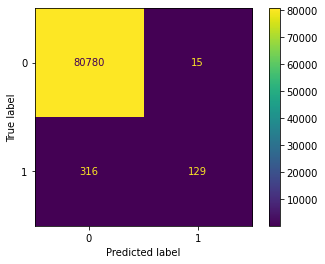

In [96]:
from sklearn.metrics import plot_confusion_matrix

#from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
# cm = confusion_matrix(y_train, model.predict(X_train))
# ConfusionMatrixDisplay(confusion_matrix=cm).plot() #same method, but figured out myself!!

plot_confusion_matrix(model, X_train, y_train)
# (0,0) is correct prediction true negative
# (1,1) is true positive
# If True label == Predicted label, then model predicted correctly

#(1,0) and (0,1) is false negatives and false positives repectively ie predicted T/F incorrectly, false
# see "operating points"?

In [97]:
print("Classification report:")
print(classification_report(pred, y_test))

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17376
           1       0.32      0.94      0.48        33

    accuracy                           1.00     17409
   macro avg       0.66      0.97      0.74     17409
weighted avg       1.00      1.00      1.00     17409



In [116]:
models_classification_reports = pd.DataFrame(columns=['model', 'accuracy','precision','recall'])

model_list = [
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    ExtraTreesClassifier(),
    KNeighborsClassifier(),
    LogisticRegression(), 
    SVC()
]

best_score = 0
best_model = None

for model in model_list:
  model.fit(X_train, y_train)
  model.fit(X_val, y_val)
  pred = model.predict(X_test)
  stat_values = list(precision_recall_fscore_support(y_test, pred)) #change to list cos cant append tuple
  s = models_classification_reports.shape[0]
  models_classification_reports.loc[s, 'model'] = f"{model}"
  models_classification_reports.loc[s, 'accuracy'] = accuracy_score(y_test, pred) #accuracy score val in accuracy col
  models_classification_reports.loc[s, 'precision'] = stat_values[0][1] #precision val in precision col
  #precision gets smaller as more false positives
  models_classification_reports.loc[s, 'recall'] = stat_values[1][1] #recall val in recall col
  #recall gets smaller as more false negatives
  #models_classification_reports.loc[s, 'f1-score'] = stat_values[2][1] #f1-score val in f1-score col
  if model.score(X_test, pred) > best_score:
    best_score = model.score(X_test, pred)
    best_model = f"{model}"
    best_prsf = precision_recall_fscore_support(y_test, pred)

print(models_classification_reports)
print("The best model is: ", best_model)
print("with a score of: ", best_score)
print("and precision, recall, fscore values of: ")
print(best_prsf)

                          model  accuracy precision    recall
0      RandomForestClassifier()  0.996209  0.941176  0.333333
1  GradientBoostingClassifier()  0.994945  0.564516  0.364583
2        ExtraTreesClassifier()  0.995922  0.820513  0.333333
3        KNeighborsClassifier()   0.99483       1.0    0.0625
4          LogisticRegression()  0.995003       1.0   0.09375
5                         SVC()  0.995003       1.0   0.09375
The best model is:  RandomForestClassifier()
with a score of:  1.0
and precision, recall, fscore values of: 
(array([0.99631655, 0.94117647]), array([0.99988448, 0.33333333]), array([0.99809732, 0.49230769]), array([17313,    96]))


Implement a __evaluation()__ function to evaluate the metrics mentioned above 

In [99]:
def evaluate(model, verbose=False):
    """
    Set verbose = True to print accuracy, classification report and plot
    confusion matrix
    """
    metrics = {}
    global pred
    metrics['accuracy'] = accuracy_score(y_test, pred)
    verbose and print (f"The accuracy is {metrics['accuracy']}")
    verbose and plot_confusion_matrix(model,X_test, y_test)
    metrics['precision'] = precision_score(y_test, pred)
    metrics['recall'] = recall_score(y_test, pred)
    verbose and print (f"The classification report looks like : \n {classification_report(pred, y_test)}")
    return metrics

In [100]:
#output

NameError: ignored

If we consider __Recall__ `GradientBoostinClassifier` is working better than other models in default configuration. Lets improve the function to automatically determine the best model

In [105]:

def train_model(model):
  return model.fit(X_train, y_train)
    # TODO

def select_best(model_list):
  best_score = 0
  best_model = None

  for model in model_list:
    print(model)
    trained_model = train_model(model) #model.fit using training data
    score = trained_model.score(X_val, y_val) #model performance
    if score > best_score:
      best_score = score
      best_model = model
  return best_model, best_score


In [106]:
select_best(model_list)

RandomForestClassifier()
GradientBoostingClassifier()
ExtraTreesClassifier()
KNeighborsClassifier()
LogisticRegression()
SVC()


(GradientBoostingClassifier(), 0.9955195588488712)

In [ ]:
#output

### Saving the Model

So you're happy with your model? Now you need to save it.

Once it's saved, we can share it with our team, load it back in to make predictions in some other system, or load it back in to compare with new models that you train, for example.

## Key Takeaways
- The process for model training and evaluation goes as follows
    - Train a model on the training set
    - Evaluate the model on the validation set
    - Repeat for as many variations of model as you can
    - Select the best model based on its performance on the validation set
    - Report the performance of the model using the test set, but do not use this to make any decisions about the model!
- Never use the test set to choose between models. The moment you pick a model based on test set performance, you're showing it the answers!
- Both the validatoin and test set are a measure of how well the model will generalise to unseen examples
- The validation set is used to compare different models and choose between them once they've been trained
- The difference 
- This demo barely scratches the surface. Going forward, you could explore:
    - the settings of the different models we've experimented with, which are known as hyperparameters
    - other machine learning models, such as deep learning models like neural networks
    - other machine learning libraries, like Apache Spark's MLLib
    - other preprocessing techniques
